# Get started with data in Pandas

In [2]:
import pandas as pd 
# Install Pandas and Matplotlib from requirements.txt
# in the terminal run...
# pip install -r requirements.txt

In [5]:
# Create a Pandas data frame to store and use our koala data
koala_data = pd.read_csv('koala_sightings_data.csv') 
print(koala_data.shape)

# Tell us about our data
print(koala_data.info())

(649, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      649 non-null    int64  
 1   SurveyArea               649 non-null    object 
 2   LGA                      649 non-null    object 
 3   BushlandOrUrban          649 non-null    object 
 4   Methodology              649 non-null    object 
 5   Date                     649 non-null    object 
 6   Time                     645 non-null    object 
 7   TransectID               649 non-null    float64
 8   Year                     649 non-null    int64  
 9   SurveyNumber             649 non-null    int64  
 10  SiteNumber               649 non-null    int64  
 11  SiteName                 649 non-null    object 
 12  Transect                 649 non-null    float64
 13  SightingNumber           649 non-null    int64  
 14  Distance_m      

# Explore your data

In [7]:
# Get just the column names
print(koala_data.columns)

#How many locations are we looking at?
print(koala_data.LGA.unique())

Index(['_id', 'SurveyArea', 'LGA', 'BushlandOrUrban', 'Methodology', 'Date',
       'Time', 'TransectID', 'Year', 'SurveyNumber', 'SiteNumber', 'SiteName',
       'Transect', 'SightingNumber', 'Distance_m', 'Bearing', 'AgeStatus',
       'NumberOfAdults', 'NumberOfSubadults', 'NumberOfJuveniles', 'Sex',
       'Disease', 'Waypoint', 'Eastings', 'Northings', 'TreeSpecies',
       'HeightOfKoalaInTree_m', 'HeightOfTree_m', 'DBH_cm', 'CrownSize_m',
       'CrownDensity_percentage', 'OldTransectNumber'],
      dtype='object')
['Logan City' 'Redland City' 'Brisbane City' 'Moreton Bay' 'Ipswich'
 'Logan' 'Gold Coast' 'Noosa']


In [9]:
# Filter for only the results that are in the Gold Coast
golden_koalas = koala_data.loc[koala_data["LGA"] == "Gold Coast"]
print(golden_koalas)

     _id  SurveyArea         LGA BushlandOrUrban     Methodology        Date  \
511  512  Gold Coast  Gold Coast        Bushland  Strip-transect  20/07/2012   
512  513  Gold Coast  Gold Coast        Bushland  Strip-transect   3/08/2012   
513  514  Gold Coast  Gold Coast        Bushland  Strip-transect   9/08/2012   
514  515  Gold Coast  Gold Coast        Bushland  Strip-transect  21/08/2012   
515  516  Gold Coast  Gold Coast        Bushland  Strip-transect  22/08/2012   
516  517  Gold Coast  Gold Coast        Bushland  Strip-transect  28/08/2012   
517  518  Gold Coast  Gold Coast        Bushland  Strip-transect   7/03/2013   
518  519  Gold Coast  Gold Coast        Bushland  Strip-transect  13/03/2013   
519  520  Gold Coast  Gold Coast        Bushland  Strip-transect  13/03/2013   
520  521  Gold Coast  Gold Coast        Bushland  Strip-transect  14/03/2013   
521  522  Gold Coast  Gold Coast        Bushland  Strip-transect  14/03/2013   
522  523  Gold Coast  Gold Coast        

In [11]:
# Save that data for later
golden_koalas.to_csv("golden_koalas.csv")

#How many locations are we looking at?
print(koala_data.LGA.unique())

['Logan City' 'Redland City' 'Brisbane City' 'Moreton Bay' 'Ipswich'
 'Logan' 'Gold Coast' 'Noosa']


# Visualise data

## Do koalas like tall trees?

In [ ]:
# Prepare tree/koala height data

tree_heights = koala_data['HeightOfTree_m']
koala_heights = koala_data['HeightOfKoalaInTree_m']

print(koala_heights)


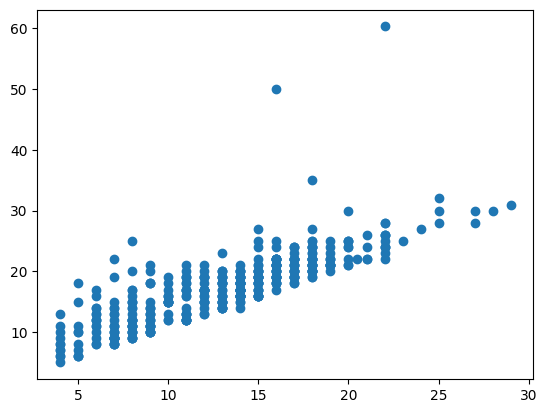

In [13]:
# Create a scatter plot to relate tree height to koala height in tree

import matplotlib.pyplot as plt

plt.scatter(koala_heights, tree_heights)

## Where are the koalas?

In [14]:
# For each LGA count how many sightings there are 
koala_sighting_count = koala_data.groupby('LGA')["_id"].count()

print(koala_sighting_count)

LGA
Brisbane City     66
Gold Coast        53
Ipswich           39
Logan             24
Logan City        25
Moreton Bay      233
Noosa              7
Redland City     202
Name: _id, dtype: int64


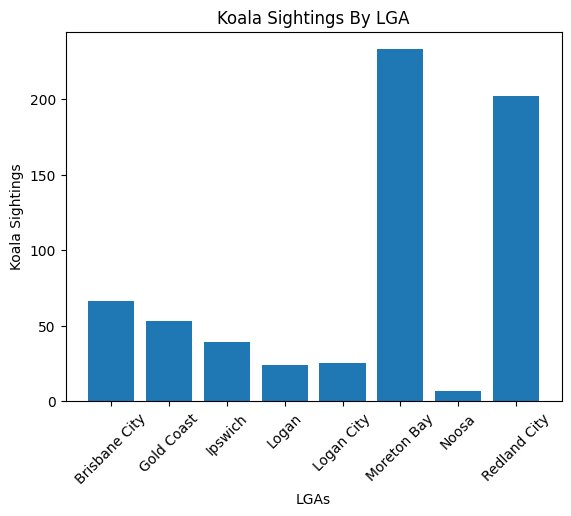

In [17]:
# Make the bar chart
import matplotlib.pyplot  as plt

# Sepearate the data for the X and Y axis
lgas = koala_sighting_count.keys()
counts = koala_sighting_count.values

# Make it a vertical bar chart
plt.bar(lgas, counts)

plt.title('Koala Sightings By LGA')
plt.xlabel('LGAs')
plt.ylabel('Koala Sightings')


plt.xticks(rotation = 45)

plt.show()

## How tall are the trees in each LGA?

LGA
Brisbane City    14.796875
Gold Coast       20.700000
Ipswich          18.735294
Logan            19.666667
Logan City       15.880000
Moreton Bay      18.772727
Noosa            18.400000
Redland City     15.700000
Name: HeightOfTree_m, dtype: float64


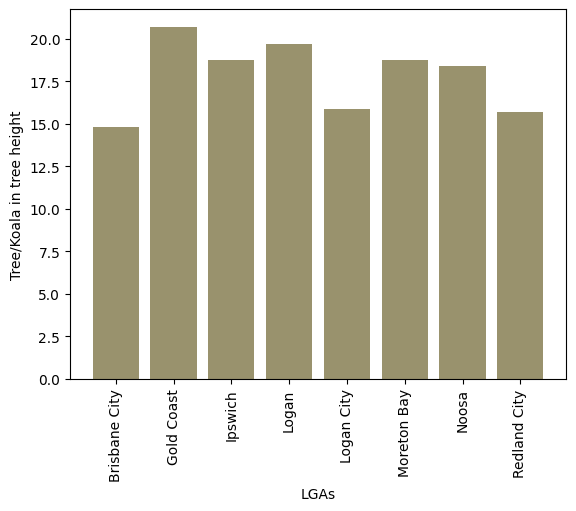

In [20]:
# Get the 2 series of data
tree_heights_mean = koala_data.groupby('LGA')["HeightOfTree_m"].mean()
print(tree_heights_mean)

# Plot a column graph - height of trees
fig, ax = plt.subplots() # This is a different way to set up your plots to do fancier stuff!
x = tree_heights_mean.keys()
y = tree_heights_mean.values
hbars = ax.bar(x, y, color="#99926d")

# axis labels, etc
plt.xticks(rotation = 90)
plt.xlabel('LGAs')
plt.ylabel('Tree/Koala in tree height')

plt.show()

## How high are the koalas in each LGA?

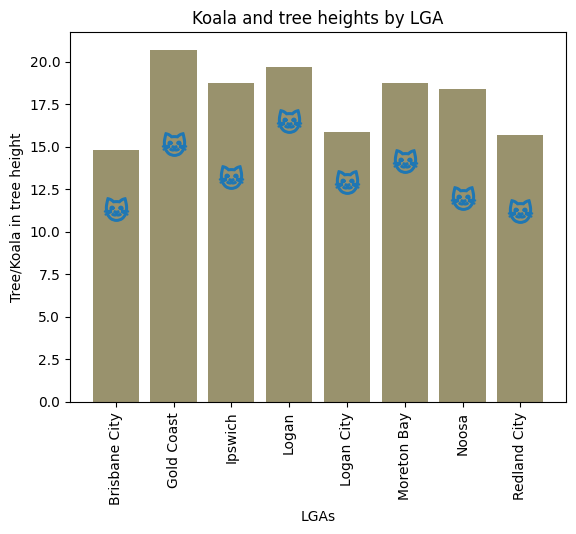

In [23]:
# Get the 2 series of data
tree_heights_mean = koala_data.groupby('LGA')["HeightOfTree_m"].mean()
koala_in_tree_heights_mean = koala_data.groupby('LGA')["HeightOfKoalaInTree_m"].mean()

# Plot a column graph - height of trees
fig, ax = plt.subplots()
x = tree_heights_mean.keys()
y = tree_heights_mean.values
hbars = ax.bar(x, y, color="#99926d")

# Plot a scatter plot - height of Koalas
k_x = koala_in_tree_heights_mean.keys()
k_y = koala_in_tree_heights_mean.values
plt.scatter(k_x, k_y, marker="$\U0001F431$", s=300)
# Koala Unicode
# "$\U0001F428$"


# axis labels, etc
plt.xticks(rotation = 90)
plt.title('Koala and tree heights by LGA')
plt.xlabel('LGAs')
plt.ylabel('Tree/Koala in tree height')

plt.show()
